In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vabdoamr","key":"e28ec921790b96821ec2846702ef0d8f"}'}

In [2]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 599M/612M [00:01<00:00, 294MB/s]
100% 612M/612M [00:02<00:00, 221MB/s]


In [5]:
!unzip -q gtsrb-german-traffic-sign.zip -d gtsrb

In [6]:
import os
import cv2
from sklearn.model_selection import train_test_split

In [7]:
data_dir = "gtsrb/Train"

IMG_SIZE = 32

In [8]:
images = []
labels = []

for class_id in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_id)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)


            img = cv2.imread(img_path)
            if img is None:
                continue


            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))


            img = img.astype('float32') / 255.0


            images.append(img)
            labels.append(int(class_id))


In [11]:
images = np.array(images)
labels = np.array(labels)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Images shape: (39209, 32, 32, 3)
Labels shape: (39209,)
Training samples: 31367
Testing samples: 7842


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [14]:
num_classes = len(np.unique(labels))

model = models.Sequential([

    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),


    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,459 (642.42 KB)

 Trainable params: 164,459 (642.42 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test, y_test)
)

Epoch 1/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.2243 - loss: 2.8869 - val_accuracy: 0.8015 - val_loss: 0.6873
Epoch 2/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7863 - loss: 0.6998 - val_accuracy: 0.9383 - val_loss: 0.2152
Epoch 3/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9010 - loss: 0.3178 - val_accuracy: 0.9725 - val_loss: 0.1133
Epoch 4/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9440 - loss: 0.1817 - val_accuracy: 0.9807 - val_loss: 0.0731
Epoch 5/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9603 - loss: 0.1262 - val_accuracy: 0.9837 - val_loss: 0.0583
Epoch 6/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9706 - loss: 0.1003 - val_accuracy: 0.9870 - val_loss: 0.0508
Epoch 7/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9762 - loss: 0.0798 - val_accuracy: 0.9899 - val_loss: 0.0385
Epoch 8/10
491/491 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9804 - loss: 0.0654 - val_accuracy: 

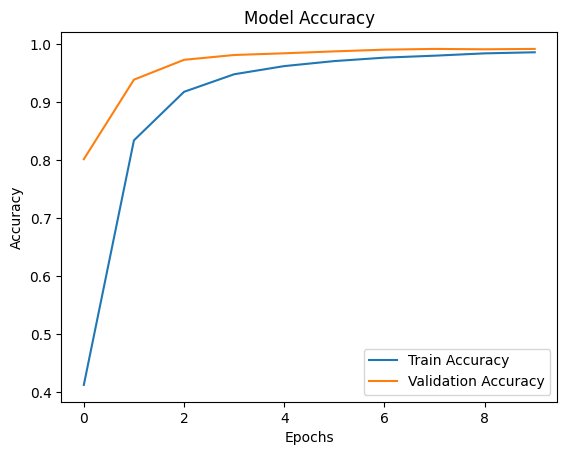

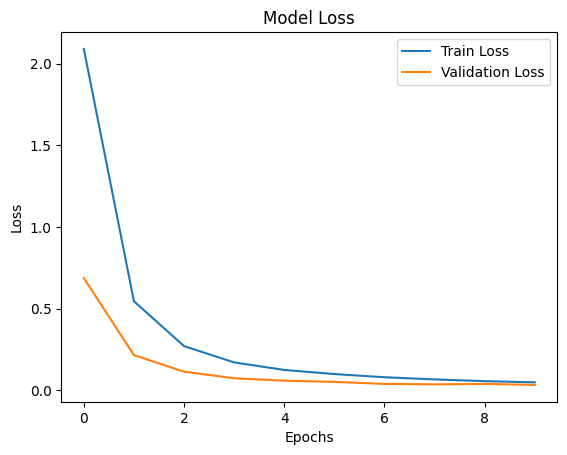

In [16]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Model Loss")
plt.show()


246/246 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


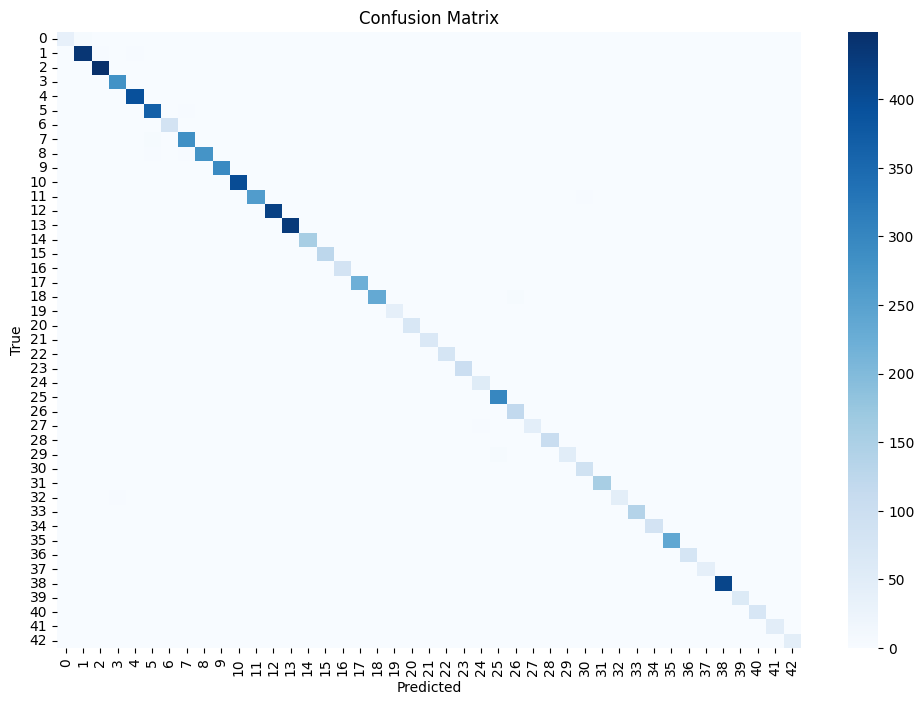

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        42
           1       0.99      0.99      0.99       444
           2       0.99      1.00      0.99       450
           3       0.98      0.99      0.99       282
           4       0.99      0.99      0.99       396
           5       0.98      0.98      0.98       372
           6       1.00      1.00      1.00        84
           7       0.98      0.98      0.98       288
           8       1.00      0.98      0.99       282
           9       1.00      1.00      1.00       294
          10       0.99      1.00      0.99       402
          11       1.00      0.98      0.99       264
          12       1.00      1.00      1.00       420
          13       1.00      1.00      1.00       432
          14       1.00      1.00      1.00       156
          15       0.99      0.99      0.99       126
          16       1.00      1.00      1.00        84
          17       1.00    

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print(classification_report(y_test, y_pred_classes))


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    fill_mode='nearest'
)

In [19]:
datagen.fit(X_train)

In [20]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=15,
    validation_data=(X_test, y_test)
)

Epoch 1/15


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.8185 - loss: 0.6593 - val_accuracy: 0.9881 - val_loss: 0.0473
Epoch 2/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9136 - loss: 0.2812 - val_accuracy: 0.9920 - val_loss: 0.0295
Epoch 3/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9361 - loss: 0.2071 - val_accuracy: 0.9911 - val_loss: 0.0318
Epoch 4/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 43ms/step - accuracy: 0.9499 - loss: 0.1688 - val_accuracy: 0.9938 - val_loss: 0.0228
Epoch 5/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9570 - loss: 0.1413 - val_accuracy: 0.9946 - val_loss: 0.0175
Epoch 6/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9666 - loss: 0.1101 - val_accuracy: 0.9946 - val_loss: 0.0166
Epoch 7/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 21s 40ms/step - accuracy: 0.9652 - loss: 0.1113 - val_accuracy: 0.9958 - val_loss: 0.0147
Epoch 8/15
491/491 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9674 - loss: 0.1034 - val_accurac

In [21]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

In [24]:
IMG_SIZE_MOBILENET = 96

X_train_resized = tf.image.resize(X_train, (IMG_SIZE_MOBILENET, IMG_SIZE_MOBILENET))
X_test_resized  = tf.image.resize(X_test, (IMG_SIZE_MOBILENET, IMG_SIZE_MOBILENET))

print("Resized train shape:", X_train_resized.shape)
print("Resized test shape:", X_test_resized.shape)

Resized train shape: (31367, 96, 96, 3)
Resized test shape: (7842, 96, 96, 3)


In [25]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models

base_model = MobileNetV2(weights="imagenet", include_top=False,
                         input_shape=(IMG_SIZE_MOBILENET, IMG_SIZE_MOBILENET, 3))

base_model.trainable = False

model_mobilenet = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
model_mobilenet.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

history_mobilenet = model_mobilenet.fit(
    X_train_resized, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_resized, y_test)
)

Epoch 1/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 43ms/step - accuracy: 0.3913 - loss: 2.1647 - val_accuracy: 0.7439 - val_loss: 0.8601
Epoch 2/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 39s 11ms/step - accuracy: 0.6546 - loss: 1.0753 - val_accuracy: 0.7906 - val_loss: 0.6564
Epoch 3/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7206 - loss: 0.8465 - val_accuracy: 0.8375 - val_loss: 0.5285
Epoch 4/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7530 - loss: 0.7391 - val_accuracy: 0.8531 - val_loss: 0.4693
Epoch 5/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.7713 - loss: 0.6719 - val_accuracy: 0.8644 - val_loss: 0.4145
Epoch 6/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.7926 - loss: 0.6102 - val_accuracy: 0.8776 - val_loss: 0.3830
Epoch 7/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8106 - loss: 0.5569 - val_accuracy: 0.8852 - val_loss: 0.3648
Epoch 8/10
981/981 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8201 - loss: 0.5205 - 

In [27]:
loss_cnn, acc_cnn = model.evaluate(X_test, y_test, verbose=0)

loss_mobilenet, acc_mobilenet = model_mobilenet.evaluate(X_test_resized, y_test, verbose=0)

print("Custom CNN Accuracy:", acc_cnn)
print("MobileNetV2 (96x96) Accuracy:", acc_mobilenet)


Custom CNN Accuracy: 0.9964295029640198
MobileNetV2 (96x96) Accuracy: 0.9007906317710876


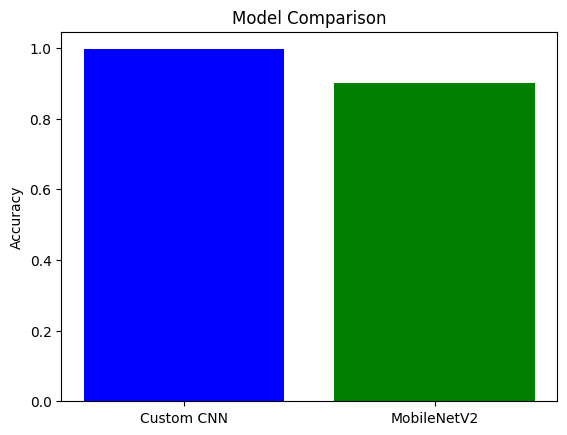

In [28]:
import matplotlib.pyplot as plt

plt.bar(["Custom CNN", "MobileNetV2"], [acc_cnn, acc_mobilenet], color=['blue','green'])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()